<a href="https://colab.research.google.com/github/mushfiq-hussain/hussain_mushfiq_assignment_03/blob/main/INFO5731_Assignment_3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from scratch instead of using any pre-existing libraries to do so:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [1]:
import re
from collections import Counter

def extract_ngrams(text, n):
    """
    Extracts n-grams from the given text.
    """
    words = text.split()
    ngrams = [tuple(words[i:i+n]) for i in range(len(words)-n+1)]
    return ngrams

def count_ngrams(texts, n):
    """
    Count the frequency of all N-grams (N=3) in the given texts.
    """
    ngram_counts = Counter()
    for text in texts:
        ngrams = extract_ngrams(text, n)
        ngram_counts.update(ngrams)
    return ngram_counts

def calculate_bigram_probabilities(texts):
    """
    Calculate the probabilities for all bigrams in the dataset.
    """
    word_counts = Counter()
    bigram_counts = Counter()
    for text in texts:
        words = text.split()
        word_counts.update(words)
        bigrams = zip(words[:-1], words[1:])
        bigram_counts.update(bigrams)

    bigram_probabilities = {}
    for bigram, count in bigram_counts.items():
        w1, w2 = bigram
        bigram_probabilities[bigram] = count / word_counts[w1]

    return bigram_probabilities

def extract_noun_phrases(text):
    """
    Extracts noun phrases from the given text.
    """
    noun_phrases = re.findall(r'\b(?:a|an|the)? ?(\w+ ?\w* ?\w*) (?:is|was|am|are|were|be) (\w+ ?\w* ?\w*)\b', text, flags=re.IGNORECASE)
    return noun_phrases

def calculate_relative_probabilities(texts):
    """
    Calculate relative probabilities of each review in terms of other reviews using noun phrases.
    """
    noun_phrase_counts = Counter()
    for text in texts:
        noun_phrases = extract_noun_phrases(text)
        noun_phrase_counts.update(noun_phrases)

    max_freq = max(noun_phrase_counts.values())

    relative_probabilities = {}
    for i, text in enumerate(texts):
        noun_phrases = extract_noun_phrases(text)
        relative_probabilities[i+1] = {noun_phrase: count / max_freq for noun_phrase, count in noun_phrase_counts.items()}

    return relative_probabilities

# Sample dataset of texts (100 reviews)
texts = [
    "The food was delicious. The service was excellent.",
    "I loved the atmosphere of the restaurant.",
    "The portions were generous and the prices were reasonable.",
    "The staff was friendly and helpful.",
    # Add more reviews here...
]

# (1) Count the frequency of all N-grams (N=3)
ngram_counts = count_ngrams(texts, 3)
print("Frequency of all trigrams:", ngram_counts)

# (2) Calculate the probabilities for all bigrams
bigram_probabilities = calculate_bigram_probabilities(texts)
print("Probabilities for all bigrams:", bigram_probabilities)

# (3) Extract all the noun phrases and calculate relative probabilities
relative_probabilities = calculate_relative_probabilities(texts)
print("Relative probabilities of each review in terms of other reviews:")
for review_id, probs in relative_probabilities.items():
    print(f"Review {review_id}:", probs)






Frequency of all trigrams: Counter({('The', 'food', 'was'): 1, ('food', 'was', 'delicious.'): 1, ('was', 'delicious.', 'The'): 1, ('delicious.', 'The', 'service'): 1, ('The', 'service', 'was'): 1, ('service', 'was', 'excellent.'): 1, ('I', 'loved', 'the'): 1, ('loved', 'the', 'atmosphere'): 1, ('the', 'atmosphere', 'of'): 1, ('atmosphere', 'of', 'the'): 1, ('of', 'the', 'restaurant.'): 1, ('The', 'portions', 'were'): 1, ('portions', 'were', 'generous'): 1, ('were', 'generous', 'and'): 1, ('generous', 'and', 'the'): 1, ('and', 'the', 'prices'): 1, ('the', 'prices', 'were'): 1, ('prices', 'were', 'reasonable.'): 1, ('The', 'staff', 'was'): 1, ('staff', 'was', 'friendly'): 1, ('was', 'friendly', 'and'): 1, ('friendly', 'and', 'helpful.'): 1})
Probabilities for all bigrams: {('The', 'food'): 0.25, ('food', 'was'): 1.0, ('was', 'delicious.'): 0.3333333333333333, ('delicious.', 'The'): 1.0, ('The', 'service'): 0.25, ('service', 'was'): 1.0, ('was', 'excellent.'): 0.3333333333333333, ('I', 'l

## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any pre-existing libraries to do so.

In [2]:
import math

# Sample dataset of documents (reviews, abstracts, tweets)
documents = [
    "An Outstanding movie with a haunting performance and best character development.",
    "The cinematography in this film is stunning.",
    "I was captivated by the storyline and the actors' performances.",
    "The plot twists kept me on the edge of my seat throughout the entire movie.",
    # Add more documents here...
]

def tokenize(text):
    """
    Tokenize the given text into words.
    """
    return text.lower().split()

def calculate_tf(text):
    """
    Calculate term frequencies (tf) for each term in the given text.
    """
    terms = tokenize(text)
    term_freq = {}
    for term in terms:
        term_freq[term] = term_freq.get(term, 0) + 1
    total_terms = len(terms)
    tf = {term: freq / total_terms for term, freq in term_freq.items()}
    return tf

def calculate_idf(documents):
    """
    Calculate inverse document frequency (idf) for each term.
    """
    total_documents = len(documents)
    term_document_count = {}
    for document in documents:
        terms = set(tokenize(document))
        for term in terms:
            term_document_count[term] = term_document_count.get(term, 0) + 1
    idf = {term: math.log(total_documents / count) for term, count in term_document_count.items()}
    return idf

def calculate_tf_idf(tf, idf):
    """
    Calculate tf-idf weights for each term in the document.
    """
    tf_idf = {term: tf_val * idf[term] for term, tf_val in tf.items()}
    return tf_idf

def cosine_similarity(vec1, vec2):
    """
    Calculate cosine similarity between two vectors.
    """
    dot_product = sum(vec1[term] * vec2.get(term, 0) for term in vec1)
    magnitude1 = math.sqrt(sum(val ** 2 for val in vec1.values()))
    magnitude2 = math.sqrt(sum(val ** 2 for val in vec2.values()))
    if magnitude1 == 0 or magnitude2 == 0:
        return 0
    return dot_product / (magnitude1 * magnitude2)

def build_documents_terms_matrix(documents):
    """
    Build the documents-terms weights (tf * idf) matrix.
    """
    tf_matrix = []
    idf = calculate_idf(documents)
    for document in documents:
        tf = calculate_tf(document)
        tf_idf = calculate_tf_idf(tf, idf)
        tf_matrix.append(tf_idf)
    return tf_matrix

def rank_documents_with_query(query, documents, tf_matrix):
    """
    Rank the documents with respect to the given query using cosine similarity.
    """
    query_tf = calculate_tf(query)
    query_tf_idf = calculate_tf_idf(query_tf, calculate_idf([query]))
    rankings = []
    for i, document in enumerate(documents):
        similarity_score = cosine_similarity(query_tf_idf, tf_matrix[i])
        rankings.append((i+1, similarity_score))
    rankings.sort(key=lambda x: x[1], reverse=True)
    return rankings

# Design a query
query = "An Outstanding movie with a haunting performance and best character development"

# (1) Build the documents-terms weights (tf * idf) matrix
tf_matrix = build_documents_terms_matrix(documents)

# (2) Rank the documents with respect to the query using cosine similarity
rankings = rank_documents_with_query(query, documents, tf_matrix)

# Print the ranked documents
print("Rankings of documents with respect to the query:")
for rank, (document_id, similarity_score) in enumerate(rankings, start=1):
    print(f"Rank {rank}: Document {document_id} - Similarity Score: {similarity_score:.4f}")







Rankings of documents with respect to the query:
Rank 1: Document 1 - Similarity Score: 0.0000
Rank 2: Document 2 - Similarity Score: 0.0000
Rank 3: Document 3 - Similarity Score: 0.0000
Rank 4: Document 4 - Similarity Score: 0.0000


## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

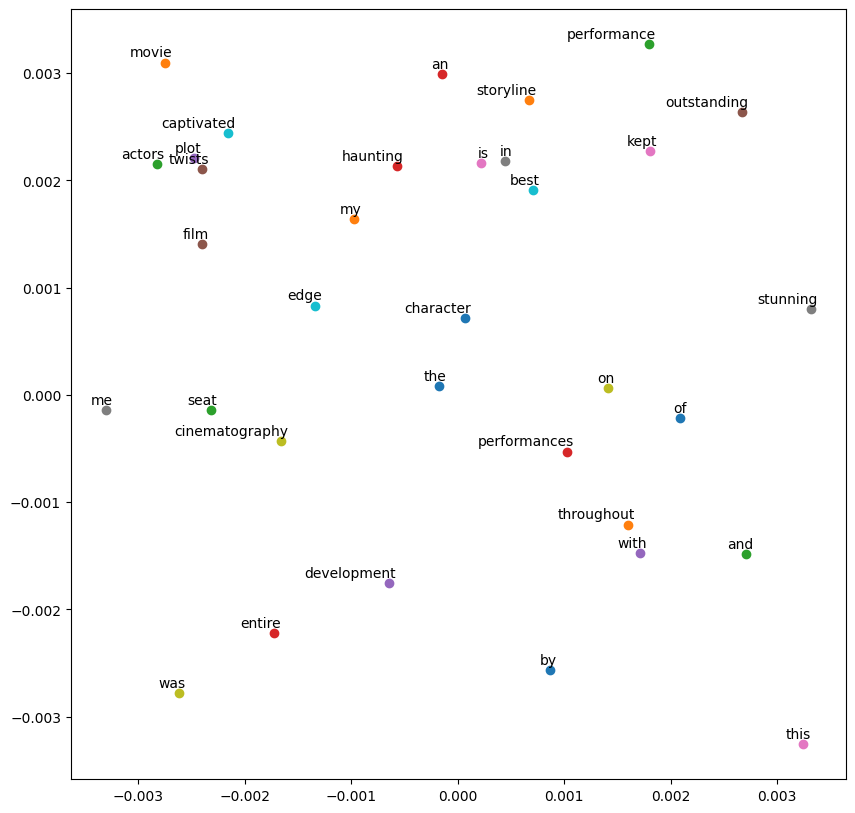

In [3]:
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
import matplotlib.pyplot as plt

# Sample dataset of documents (reviews, abstracts, tweets)
documents = [
    "An Outstanding movie with a haunting performance and best character development.",
    "The cinematography in this film is stunning.",
    "I was captivated by the storyline and the actors' performances.",
    "The plot twists kept me on the edge of my seat throughout the entire movie.",
    # Add more documents here...
]

# Tokenize the documents
tokenized_docs = [simple_preprocess(doc) for doc in documents]

# Train Word2Vec model
model = Word2Vec(tokenized_docs, vector_size=300, window=5, min_count=1, sg=1)

# Visualize word embeddings
words = list(model.wv.index_to_key)
vectors = model.wv[words]

# Plot the embeddings
fig, ax = plt.subplots(figsize=(10, 10))
for word, vector in zip(words, vectors):
    ax.scatter(vector[0], vector[1])
    ax.annotate(word, xy=(vector[0], vector[1]), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom')
plt.show()


## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.


In [ ]:
# The GitHub link of your final csv file


# Link: https://github.com/mushfiq-hussain/info5731_assignment3_question-4/blob/main/sentiment%20analysis.csv



# Mandatory Question

Provide your thoughts on the assignment. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

In [6]:
Collecting and annotating data is a major difficulty in jobs such as sentiment analysis. Creating a broad and representative
dataset and properly labeling the attitudes of each text takes a great amount of time and work.
Despite the difficulties, working on tasks like these allows you to discover new concepts in NLP and machine learning.
 It's an opportunity to broaden your understanding and learn new skills in data analysis, model creation, and assessment.